---

# Combining Color and Region Selections

---

### Import the libraries

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Read in the original image

In [25]:
image = mpimg.imread('1-Test-Image-for-Lane-Lines.jpg')

### Display Original Image

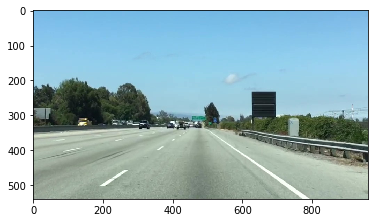

In [26]:
plt.imshow(image)
plt.show()

### X and Y sizes of the image

In [27]:
ysize = image.shape[0]
xsize = image.shape[1]

### Create two new images by copying from the original image

In [28]:
color_select= np.copy(image)
line_image = np.copy(image)

# REGION FILTER DEFINITION

### Define the ROI (region of interest) points. It is a triangle.

In [29]:
left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [470, 330]

### Define AX+B lines to find the edges of the triangle

Fit lines (y=Ax+B) to identify the  3 sided region of interest 

p.polyfit() returns the coefficients [A, B] of the fit

In [30]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print('fit_left =' , fit_left)
print('fit_right =' , fit_right)
print('fit_bottom =' , fit_bottom)

fit_left = [ -4.44680851e-01   5.39000000e+02]
fit_right = [   0.42740286  129.1206544 ]
fit_bottom = [ -5.92736380e-17   5.39000000e+02]


### Find the region inside the triangle (ROI)

In [31]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))


# COLOR FILTER DEFINITIONS

### Color Thresholds to filter the image

In [32]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

### Color filter by thresholds

In [33]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# APPLY FILTERS

### Set black not suitable with color filter - Apply the color filter

In [34]:
color_select[color_thresholds] = [0,0,0]

### Image after color filter (color_select image)

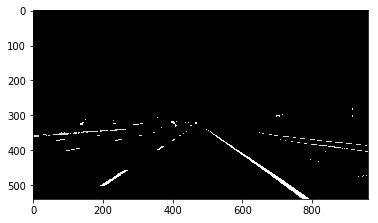

In [35]:
plt.imshow(color_select)
plt.show()

### Line-Image is still the same as original

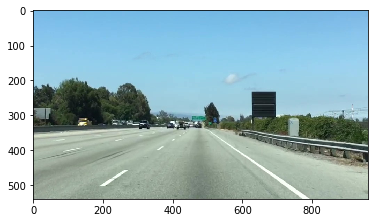

In [13]:
plt.imshow(line_image)
plt.show()

### Apply the filters (color+region) on the line_image.

Set the color red, in the selected region, but the opposite of the color filter. Color filter is for defining the area which is not a line.

In [14]:
line_image[~color_thresholds & region_thresholds] = [255,0,0]

### Both filter applied and the last image after filter

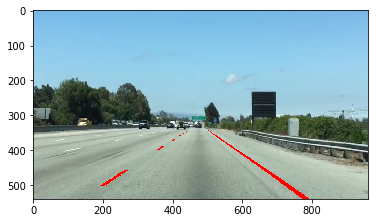

In [ ]:
plt.imshow(line_image)
plt.show()

In [ ]:
mpimg.imsave("3-Color-and-Region-Masking-Code-Result.png", line_image)

---

# ALTERNATES

### Alternate 1 - Another filter sample to select the region and apply color filter on the region

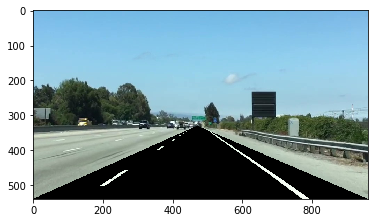

In [42]:
alternate1_image = np.copy(image)

alternate1_image[color_thresholds & region_thresholds] = [0,0,0]

plt.imshow(alternate1_image)
plt.show()

### Alternate 2 - Filter all area and select line in the region

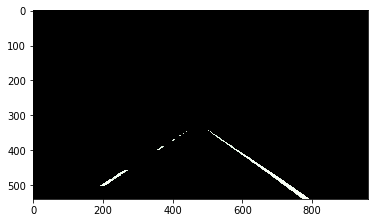

In [43]:
#Create new copy from color filtered image
alternate2_image = np.copy(color_select)

color_select[~region_thresholds] = [0,0,0]

plt.imshow(color_select)
plt.show()